In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [2]:
train=pd.read_csv('data/final_train.csv')
test=pd.read_csv('data/final_test.csv')

In [3]:
display(train.head())
display(test.head())

,SalePrice,CentralAir,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,HeatingQC Fa,HeatingQC Gd,HeatingQC Po,HeatingQC TA,Foundation BrkTil,Foundation CBlock,Foundation PConc,Foundation Slab,Foundation Stone,Foundation Wood
0,208500.0,1,0.646183,0.413547,0.348900,-0.444328,-0.773861,0.986849,1.046258,0.896833,...,0,0,0,0,0,0,1,0,0,0
1,181500.0,1,-0.063185,-0.471891,-0.059792,0.477111,0.261075,-0.287758,0.154764,-0.395604,...,0,0,0,0,0,1,0,0,0,0
2,223500.0,1,0.646183,0.563755,0.627553,-0.299076,-0.610718,-0.287758,0.980221,0.848965,...,0,0,0,0,0,0,1,0,0,0
3,140000.0,1,0.646183,0.427382,0.785457,-0.671283,-0.506205,0.349546,-1.859351,-0.682812,...,0,1,0,0,1,0,0,0,0,0
4,250000.0,1,1.355551,1.378042,1.686437,0.211573,-0.037170,1.624153,0.947203,0.753229,...,0,0,0,0,0,0,1,0,0,0


,SalePrice,CentralAir,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,HeatingQC Fa,HeatingQC Gd,HeatingQC Po,HeatingQC TA,Foundation BrkTil,Foundation CBlock,Foundation PConc,Foundation Slab,Foundation Stone,Foundation Wood
0,NaN,1,-0.772552,-1.195262,1.194149,-0.385319,-0.671897,-0.925062,-0.340510,-1.113625,...,0,0,0,1,0,1,0,0,0,0
1,NaN,1,-0.063185,-0.339470,-0.747138,0.629171,0.431865,-0.287758,-0.439565,-1.257229,...,0,0,0,1,0,1,0,0,0,0
2,NaN,1,-0.772552,0.253457,0.042381,-0.280920,-0.590326,-0.287758,0.848148,0.657493,...,0,1,0,0,0,0,1,0,0,0
3,NaN,1,-0.063185,0.204046,-0.013350,-0.285459,-0.595424,0.349546,0.881166,0.657493,...,0,0,0,0,0,0,1,0,0,0
4,NaN,1,1.355551,-0.436315,0.153842,0.517963,0.306959,-0.925062,0.683057,0.370284,...,0,0,0,0,0,0,1,0,0,0


## Section 1: Defining ML model

Since it's a regression problem we will use Gradient Boosting Regressor.

In [4]:
model=GradientBoostingRegressor()

## Section 2: Training

Since in final_test.csv we don't have the target variables we will have to split train into training samples and validation samples in order to evaluate the performance of the models.

In [5]:
training, val = train_test_split(train, test_size = .15 ,random_state = 33)
cols = [col for col in train.columns if col not in ("SalePrice")]
train_x = training[cols]
train_y = training["SalePrice"]
val_x = val[cols]
val_y = val["SalePrice"]

In [6]:
def evaluate_model(model, train_x,train_y, val_x, val_y, cols):
    # Training
    model=model.fit(train_x,train_y)
    # Predicting validation
    pred_values=model.predict(val_x)
    
    print('Explained variance by the model:',explained_variance_score(val_y,pred_values))
    print('Root Mean Square Error:',mean_squared_log_error(val_y,pred_values))
    print('R^2:',r2_score(val_y, pred_values, multioutput='variance_weighted'))
    
    plt.figure(figsize=(10,10))
    plt.title('Scatterplot predicted-true values')
    sns.scatterplot(x=val_y, y=pred_values)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.show()
    return model

Explained variance by the model: 0.9022811648503609
Root Mean Square Error: 0.018470061297608243
R^2: 0.9015771420950494


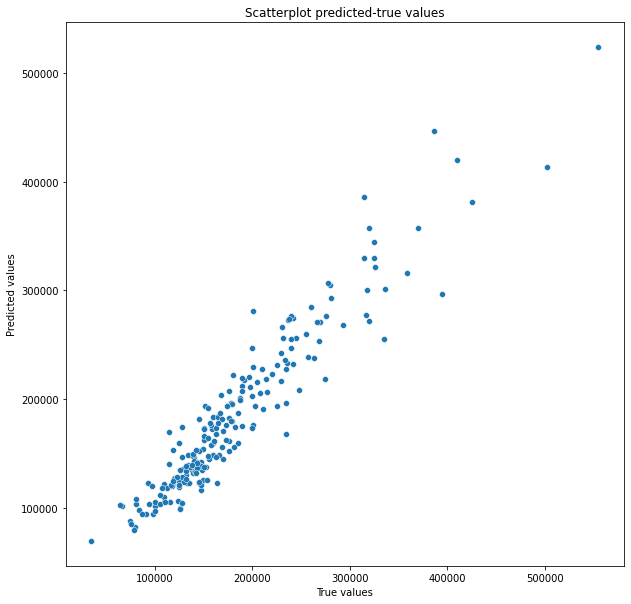

In [7]:
model=evaluate_model(model, train_x,train_y, val_x, val_y, cols)

## Section 3: Predicting test values and saving final submission

In [8]:
test_x=test[cols]
test_y=model.predict(test_x)

In [9]:
final_submission=pd.DataFrame()
final_submission['Id']=np.arange(1461,1461+len(test_y))
final_submission['SalePrice']=test_y
display(final_submission)
final_submission.to_csv('submission.csv', index=False)

,Id,SalePrice
0,1461,123263.370848
1,1462,148732.478276
2,1463,173916.311267
3,1464,178456.104503
4,1465,211119.825067
...,...,...
1454,2915,80226.772513
1455,2916,88120.782974
1456,2917,155626.693908
1457,2918,122504.071256
